In [2]:
!pip install --quiet sklearn

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import cvxpy as cp

In [4]:
np.set_printoptions(precision=2, suppress=True)

In [5]:
iris = datasets.load_iris()

In [6]:
data_iris = iris["data"]

In [7]:
print(data_iris[0:10, 0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [8]:
m,n = data_iris.shape
print("número de observaciones:%d, número de atributos: %d" % (m,n))

número de observaciones:150, número de atributos: 4


Columnas en este orden: `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`

In [9]:
print(iris["target_names"])

['setosa' 'versicolor' 'virginica']


In [10]:
print(np.unique(iris["target"]))

[0 1 2]


In [11]:
data_iris_setosa_versicolor = data_iris[0:100].copy()
classes = iris["target"][0:100].copy()

In [12]:
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [13]:
classes[0:50] = classes[0:50].copy()-1

In [14]:
print(classes)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


Estandarizamos la matriz de datos:

In [15]:
data_iris_setosa_versicolor = (data_iris_setosa_versicolor-
                               data_iris_setosa_versicolor.mean(axis=0))/data_iris_setosa_versicolor.std(axis=0)

**Añadimos la columna que indica uso de intercepto:**

In [16]:
m,n = data_iris_setosa_versicolor.shape

In [17]:
data_iris_setosa_versicolor = np.column_stack((-1*np.ones((m,1)), data_iris_setosa_versicolor))

In [18]:
print(data_iris_setosa_versicolor[0:10, 0:10])

[[-1.   -0.58  0.84 -1.01 -1.04]
 [-1.   -0.89 -0.21 -1.01 -1.04]
 [-1.   -1.21  0.21 -1.08 -1.04]
 [-1.   -1.36  0.   -0.94 -1.04]
 [-1.   -0.74  1.05 -1.01 -1.04]
 [-1.   -0.11  1.68 -0.8  -0.69]
 [-1.   -1.36  0.63 -1.01 -0.86]
 [-1.   -0.74  0.63 -0.94 -1.04]
 [-1.   -1.68 -0.42 -1.01 -1.04]
 [-1.   -0.89  0.   -0.94 -1.22]]


Visualizamos para algunos atributos:

```{margin}

Obsérvese que considerando los atributos `Sepal.Length` y `Sepal.Width` se pueden separar la clase *I. setosa* codificada como $-1$ y la clase *I. versicolor* codificada como $1$ de forma lineal.
```

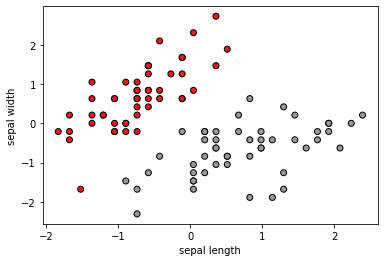

In [19]:
plt.scatter(data_iris_setosa_versicolor[:, 1], 
            data_iris_setosa_versicolor[:, 2], c=classes, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

```{margin}
Obsérvese que considerando los atributos `Petal.Length` y `Petal.Width` se pueden separar la clase *I. setosa* codificada como $-1$ y la clase *I. versicolor* codificada como $1$ de forma lineal.

```

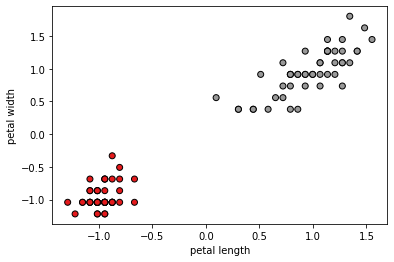

In [20]:
plt.scatter(data_iris_setosa_versicolor[:, 3], 
            data_iris_setosa_versicolor[:, 4], c=classes, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

**Función objetivo:**

$$\frac{||a||^2_2}{2}$$

**y restricciones:**

$$a^Tx_i - b \leq -1, \quad \forall i=1, \dots, N$$

$$a^Ty_i -b \geq 1, \quad \forall i=1, \dots, M$$

```{margin}

Ver [cvxpy: svm](https://www.cvxpy.org/examples/machine_learning/svm.html)

```

```{margin}

El vector `vec` contiene al intercepto $b$ y al vector $a$.

```

In [21]:
n = 5 #number of variables
vec = cp.Variable(n) #optimization variable

```{margin}

`vec[0]` es $b$, `vec[1:n]` es $a$.

```

In [22]:
fo_cvxpy = 1/2*cp.norm(vec[1:n],2)**2 #fo just includes a not intercept

In [23]:
constraints = [data_iris_setosa_versicolor[0:50,:]@vec <=-1,
               data_iris_setosa_versicolor[50:100,:]@vec >= 1]

In [24]:
obj = cp.Minimize(fo_cvxpy)

In [25]:
prob = cp.Problem(obj, constraints)
print(prob.solve())

0.6190278040023801


In [26]:
print("\nThe optimal value is", prob.value)
print("The optimal vector with intercept is")
print(vec.value)


The optimal value is 0.6190278040023801
The optimal vector with intercept is
[-0.24  0.27 -0.34  0.7   0.75]


Los primeros $50$ renglones pertenecen a la clase $\mathcal{C}_{-1}:$ *I. setosa* y los restantes $50$ renglones pertenecen a la clase $\mathcal{C}_{1}$: *I. versicolor*. Se clasifica de acuerdo al signo de: $a^Tx - b$:

In [27]:
print(np.sign(data_iris_setosa_versicolor[0:50,:]@vec.value))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [28]:
print(np.sign(data_iris_setosa_versicolor[50:100,:]@vec.value))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


Visualización utilizando únicamente `Sepal.Length` y `Sepal.Width`:

In [29]:
x_min = np.min(data_iris_setosa_versicolor[:,1])
x_max = np.max(data_iris_setosa_versicolor[:,1])
y_min = np.min(data_iris_setosa_versicolor[:,2])
y_max = np.max(data_iris_setosa_versicolor[:,2])
x_plot = np.linspace(x_min, x_max, 100)

In [30]:
b, a = vec.value[0], vec.value[1:n]

In [31]:
y_plot = 1/a[1]*(-a[0]*x_plot + b)
y_plot_minus_1 = 1/a[1]*(-a[0]*x_plot + b -1)

y_plot_plus_1 = 1/a[1]*(-a[0]*x_plot + b + 1)

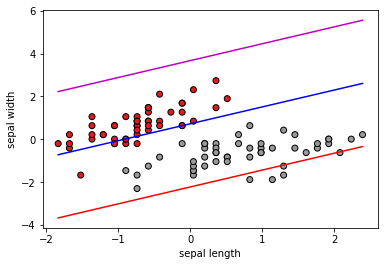

In [32]:
plt.scatter(data_iris_setosa_versicolor[:, 1], 
            data_iris_setosa_versicolor[:, 2], c=classes, cmap=plt.cm.Set1,
            edgecolor='k')
plt.plot(x_plot,y_plot,'b',
         x_plot,y_plot_minus_1, 'm',
         x_plot, y_plot_plus_1,'r')
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

Visualización utilizando únicamente `Petal.Length` y `Petal.Width`:

In [33]:
x_min = np.min(data_iris_setosa_versicolor[:,3])
x_max = np.max(data_iris_setosa_versicolor[:,3])
y_min = np.min(data_iris_setosa_versicolor[:,4])
y_max = np.max(data_iris_setosa_versicolor[:,4])
x_plot = np.linspace(x_min, x_max, 100)

In [34]:
y_plot = 1/a[3]*(-a[2]*x_plot + b)
y_plot_minus_1 = 1/a[3]*(-a[2]*x_plot + b -1)

y_plot_plus_1 = 1/a[3]*(-a[2]*x_plot + b + 1)

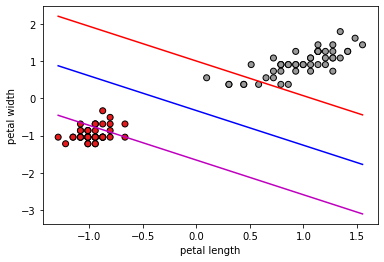

In [35]:
plt.scatter(data_iris_setosa_versicolor[:, 3], 
            data_iris_setosa_versicolor[:, 4], c=classes, cmap=plt.cm.Set1,
            edgecolor='k')
plt.plot(x_plot,y_plot,'b',
         x_plot,y_plot_minus_1, 'm',
         x_plot, y_plot_plus_1,'r')
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.show()

### Ajustando el modelo de la SVM sólo para dos atributos: `Sepal.Length` y `Sepal.Width`:

In [36]:
data_iris_setosa_versicolor = data_iris[0:100, 0:2].copy()


Aquí no estandarizamos.

In [37]:
data_iris_setosa_versicolor = np.column_stack((-1*np.ones((m,1)), data_iris_setosa_versicolor))

In [38]:
n = 3 #number of variables
vec = cp.Variable(n) #optimization variable


In [39]:
fo_cvxpy = 1/2*cp.norm(vec[1:n],2)**2 #fo just includes a not intercept

In [40]:
constraints = [data_iris_setosa_versicolor[0:50,:]@vec <=-1,
               data_iris_setosa_versicolor[50:100,:]@vec >= 1]

In [41]:
obj = cp.Minimize(fo_cvxpy)

In [42]:
prob = cp.Problem(obj, constraints)
print(prob.solve())

33.79501292632983


In [43]:
print("\nThe optimal value is", prob.value)
print("The optimal vector with intercept is")
print(vec.value)



The optimal value is 33.79501292632983
The optimal vector with intercept is
[17.32  6.32 -5.26]


In [44]:
print(np.sign(data_iris_setosa_versicolor[0:50,:]@vec.value))

[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


In [45]:
print(np.sign(data_iris_setosa_versicolor[50:100,:]@vec.value))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [46]:
b, a = vec.value[0], vec.value[1:n]

In [47]:
print(b)

17.315789240731355


In [48]:
print(a)

[ 6.32 -5.26]


In [49]:
x_min = np.min(data_iris_setosa_versicolor[:,1])
x_max = np.max(data_iris_setosa_versicolor[:,1])
y_min = np.min(data_iris_setosa_versicolor[:,2])
y_max = np.max(data_iris_setosa_versicolor[:,2])
x_plot = np.linspace(x_min, x_max, 100)

In [50]:
y_plot = 1/a[1]*(-a[0]*x_plot + b)
y_plot_minus_1 = 1/a[1]*(-a[0]*x_plot + b -1)

y_plot_plus_1 = 1/a[1]*(-a[0]*x_plot + b + 1)

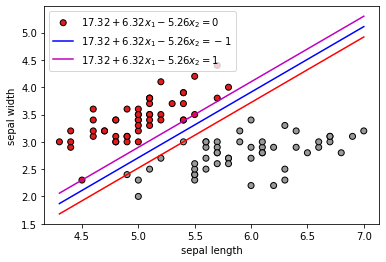

In [51]:
plt.scatter(data_iris_setosa_versicolor[:, 1], 
            data_iris_setosa_versicolor[:, 2], c=classes, cmap=plt.cm.Set1,
            edgecolor='k')
plt.plot(x_plot,y_plot,'b',
         x_plot,y_plot_minus_1, 'm',
         x_plot, y_plot_plus_1,'r')
plt.legend(["$17.32 + 6.32x_1 -5.26x_2=0$",
            "$17.32 + 6.32x_1 -5.26x_2=-1$",
            "$17.32 + 6.32x_1 -5.26x_2=1$"])
plt.xlabel("sepal length")
plt.ylabel("sepal width")
plt.show()

# 3d

In [64]:
data = np.loadtxt("datos.txt")

In [65]:
data

array([[-1.  ,  0.32, -0.19,  1.  ],
       [-1.  , -0.  , -1.27,  1.  ],
       [-1.  ,  0.88, -0.83,  1.  ],
       [-1.  ,  1.57, -1.16,  1.  ],
       [-1.  ,  0.76, -0.89,  1.  ],
       [-1.  , -0.62,  0.34,  0.  ],
       [-1.  , -1.1 ,  1.34,  0.  ],
       [-1.  ,  0.36,  1.72,  0.  ],
       [-1.  , -2.09,  0.15,  0.  ],
       [-1.  , -0.08,  0.8 ,  0.  ]])

In [66]:
labels = np.loadtxt("labels.txt")

In [67]:
labels

array([-1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.])

<IPython.core.display.Javascript object>


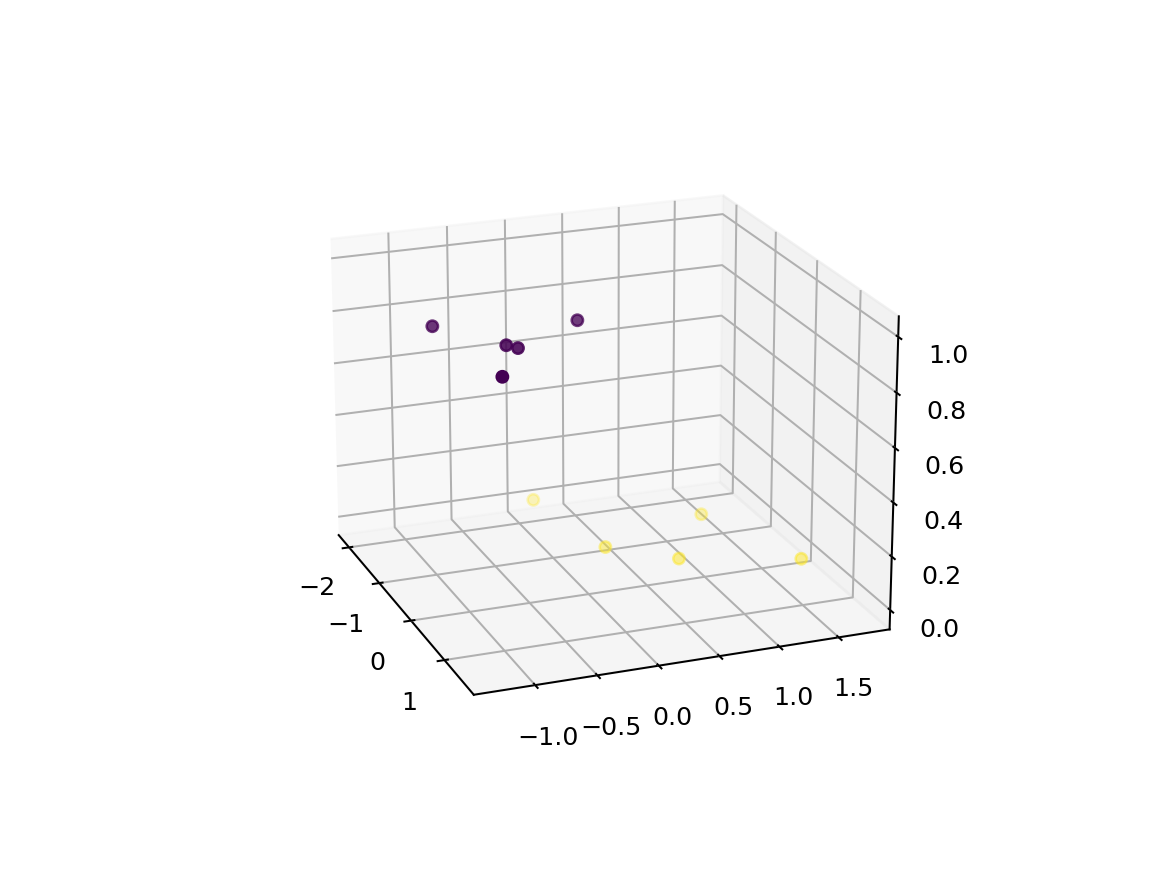

In [68]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:,1], data[:,2], data[:,3],c=labels)
plt.show()


In [69]:
n = 4

In [70]:
vec = cp.Variable(n)
fo_cvxpy = 1/2 * cp.norm(vec[1:n],2)**2

In [71]:
constraints = [data[0:5,:]@vec <= -1,
               data[5:10,:]@vec >= 1]

In [72]:
obj = cp.Minimize(fo_cvxpy)
prob = cp.Problem(obj, constraints)
print(prob.solve())

0.9899625813656726


In [73]:
print("\nThe optimal value is", prob.value)
print("The optimal beta is")
print(vec.value)


The optimal value is 0.9899625813656726
The optimal beta is
[-0.34 -0.65  0.76 -0.99]


In [74]:
b, a = vec.value[0], vec.value[1:n]

In [75]:
b

-0.3405860621404362

In [76]:
a

array([-0.65,  0.76, -0.99])

In [79]:
x_min = np.min(data[:,1])
x_max = np.max(data[:,1])
y_min = np.min(data[:,2])
y_max = np.max(data[:,2])
x_plot = np.linspace(x_min, x_max, 100)
y_plot = 1/a[1]*(-a[0]*x_plot + b)
y_plot_minus_1 = 1/a[1]*(-a[0]*x_plot + b -1)
y_plot_plus_1 = 1/a[1]*(-a[0]*x_plot + b + 1)

<IPython.core.display.Javascript object>


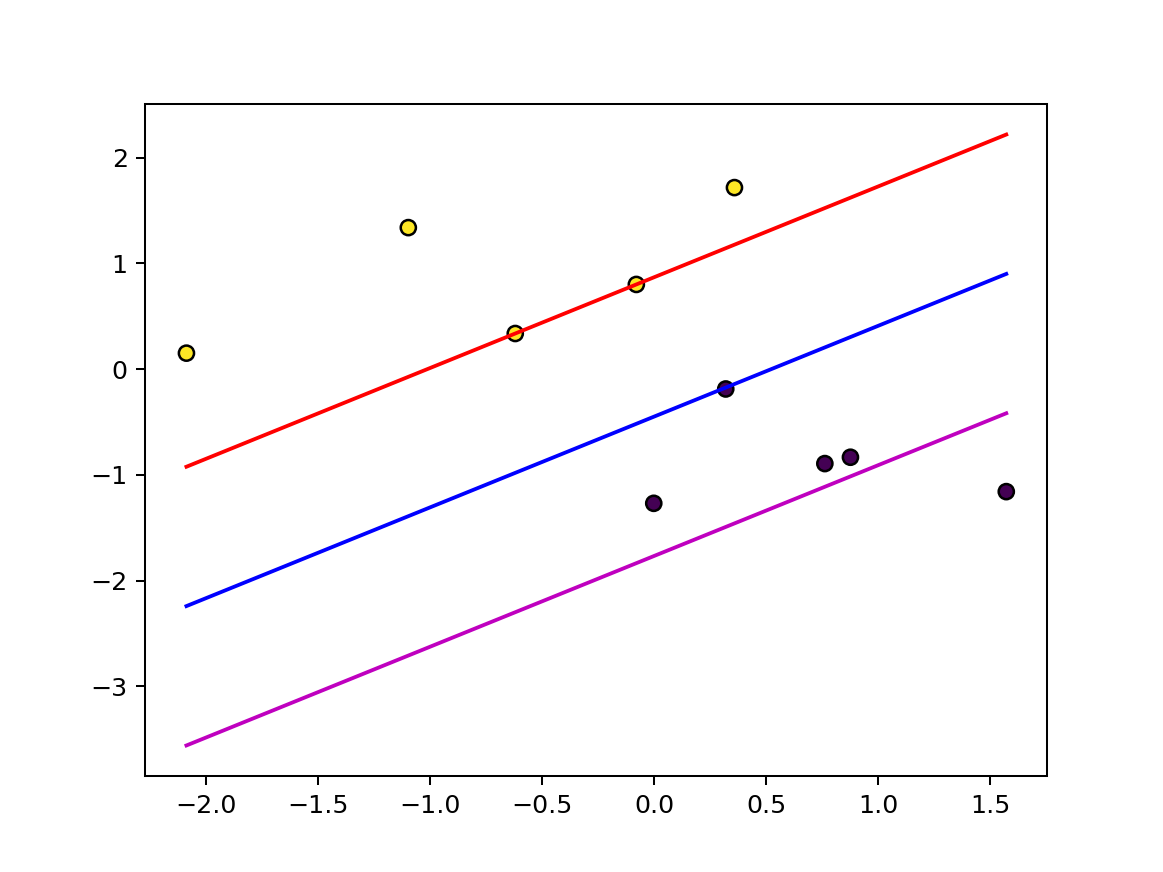

In [81]:
plt.scatter(data[:, 1], 
            data[:, 2], c=labels,
            edgecolor='k')
plt.plot(x_plot,y_plot,'b',
         x_plot,y_plot_minus_1, 'm',
         x_plot, y_plot_plus_1,'r')
plt.show()

In [82]:
y_plot = np.linspace(y_min, y_max, 100)
x1_plot,x2_plot = np.meshgrid(x_plot, y_plot)
z_plot = 1/a[2]*(-a[0]*x1_plot-a[1]*x2_plot + b)

<IPython.core.display.Javascript object>


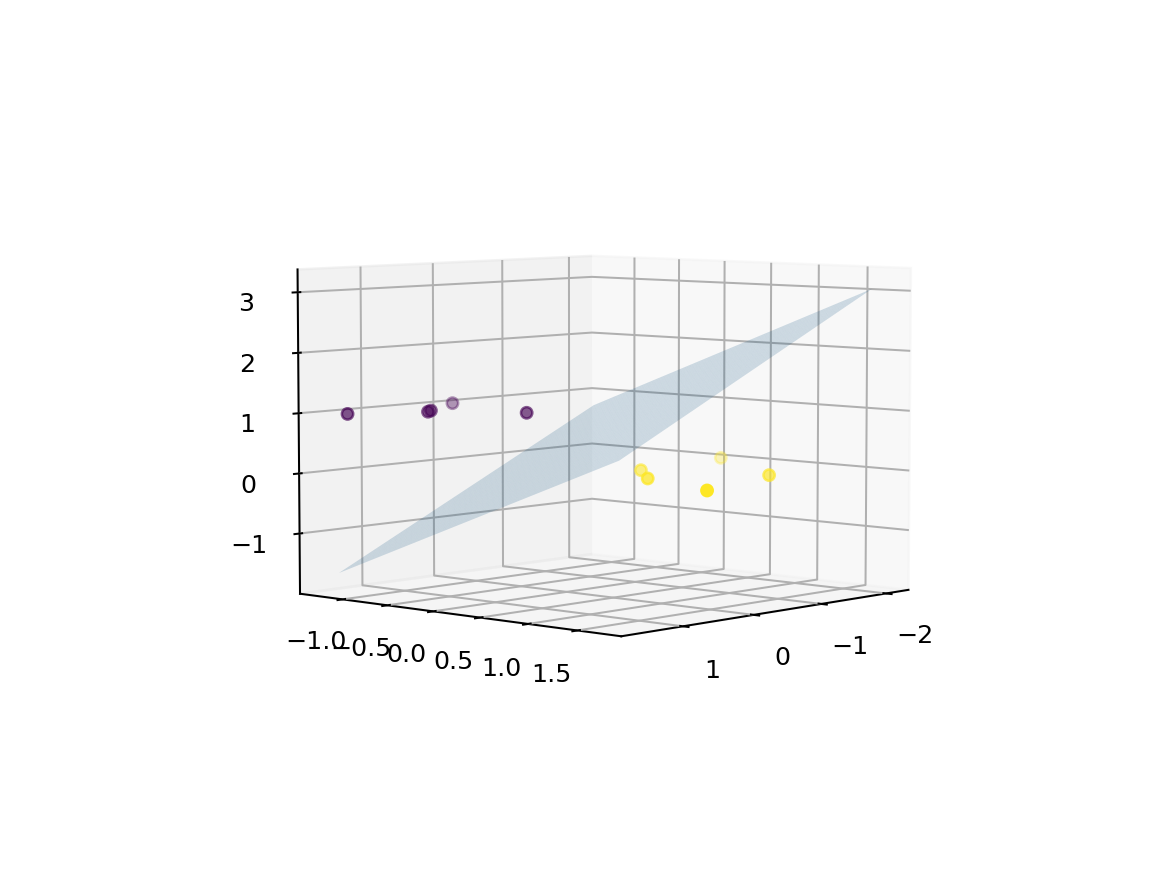

In [83]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:,1], data[:,2], data[:,3],c=labels)
ax.plot_surface(x1_plot, x2_plot, z_plot, alpha=0.2)
plt.show()

<IPython.core.display.Javascript object>


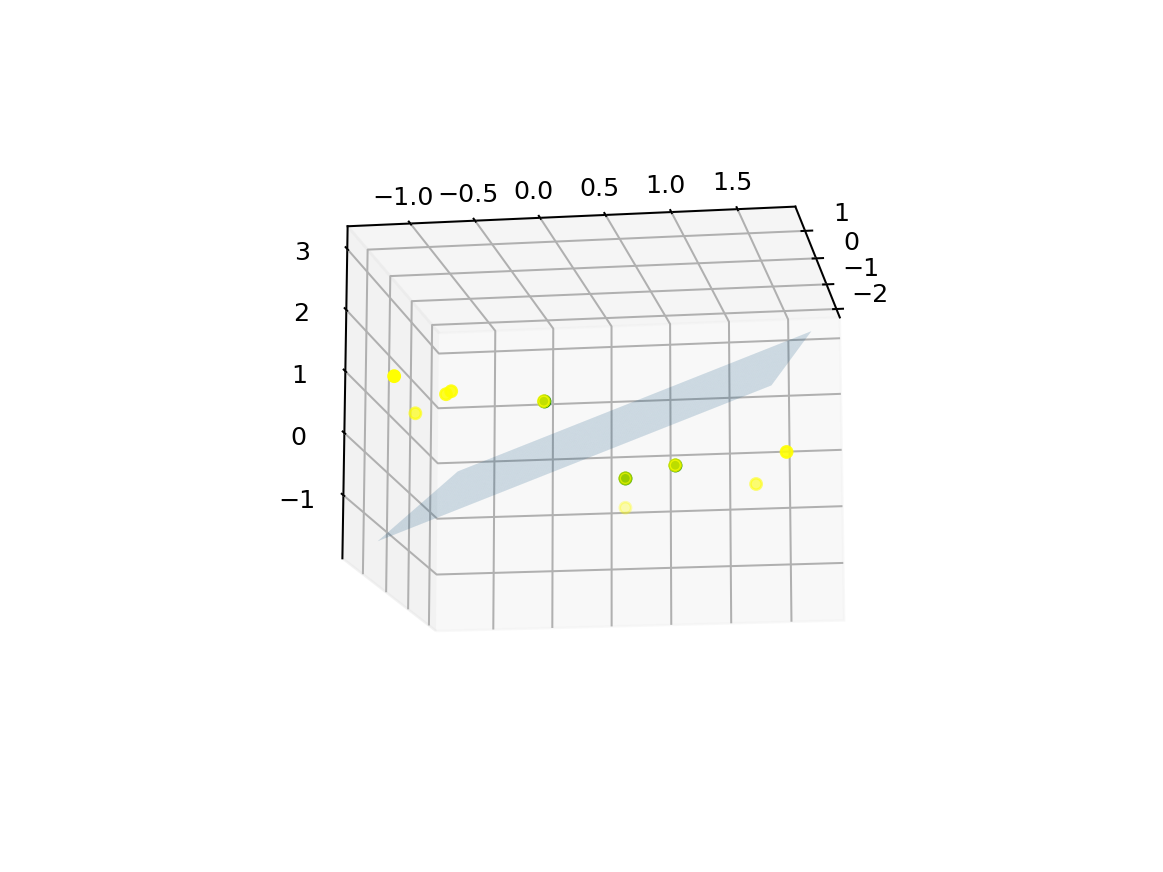

In [84]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:,1], data[:,2], data[:,3],color="yellow")
ax.scatter(data[0,1], data[0,2], data[0,3], color="green")
ax.scatter(data[5,1], data[5,2], data[5,3], color="green")
ax.scatter(data[9,1], data[9,2], data[9,3], color="green")
ax.plot_surface(x1_plot, x2_plot, z_plot, alpha=0.2)
plt.show()

In [86]:
z_plot_minus_1 = 1/a[2]*(-a[0]*x1_plot-a[1]*x2_plot + b - 1)
z_plot_plus_1 = 1/a[2]*(-a[0]*x1_plot-a[1]*x2_plot + b + 1)

<IPython.core.display.Javascript object>


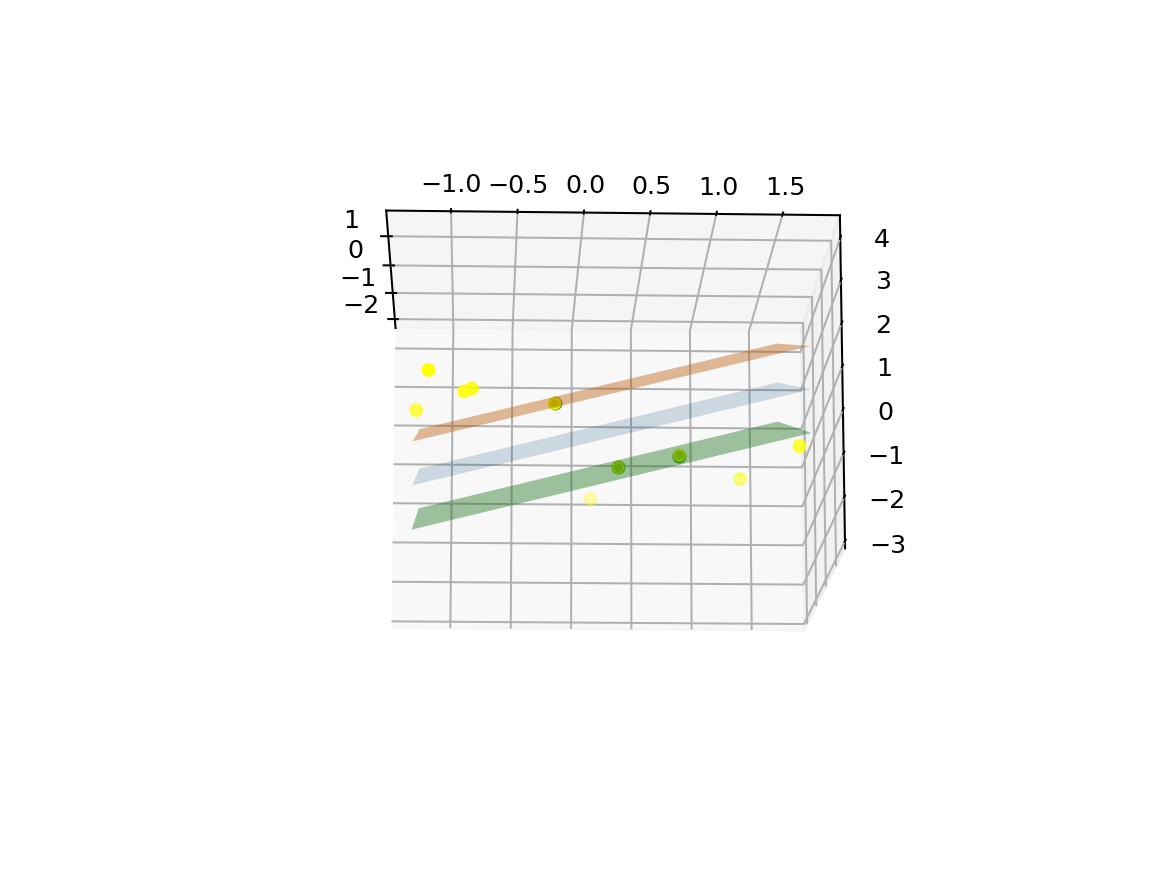

In [88]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(data[:,1], data[:,2], data[:,3],color="yellow")
ax.scatter(data[0,1], data[0,2], data[0,3], color="green")
ax.scatter(data[5,1], data[5,2], data[5,3], color="green")
ax.scatter(data[9,1], data[9,2], data[9,3], color="green")
ax.plot_surface(x1_plot, x2_plot, z_plot, alpha=0.2)
ax.plot_surface(x1_plot, x2_plot, z_plot_minus_1, alpha=0.5)
ax.plot_surface(x1_plot, x2_plot, z_plot_plus_1, alpha=0.5)
plt.show()
